# Based on "Optimal Simulations of a conservative Nonlinear Oscillator" PRL 430, 69 (1992).

Equations of motion,

$$
\dot{r}=\frac{p}{m} \\
\dot{p}=-\frac{dV}{dr}+d\cdot u(t)
$$

Optimal solution fora given energy transfer at minimum cost,

$$
u(t)=-\frac{2p}{e}(t+t_0)^{-1}
$$

final time= 2067.0687287875494 50.0
t0 parameter=  928.9406867171247
number of time steps=  413414 50.00003074915781 50.0
Posição inicial= 1.797748591989436
Momento inicial= -0.33284450660350395
Campo em t=0 = 0.0007166108910134534
50.00003074915781

transfered Energy =  0.5439231720080936
Cost Functional=  0.0009111411651477033

Campo em t=t_f = -0.06201563310869314
derivada do potencial em r(tf)=  5.10389557739626e-05
Posição final= 139.974506033049
Momento final= 0.18066119665209068


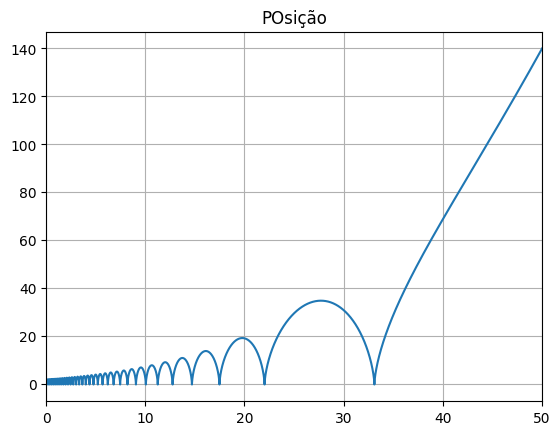

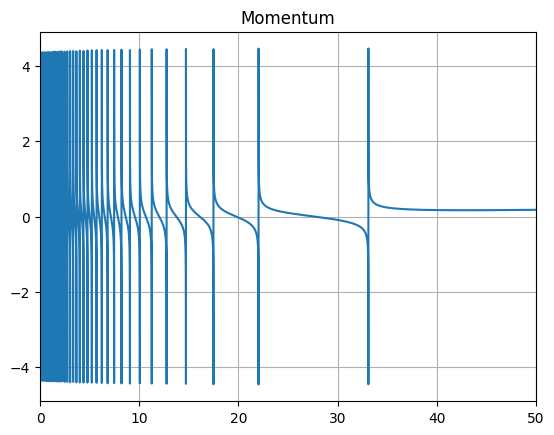

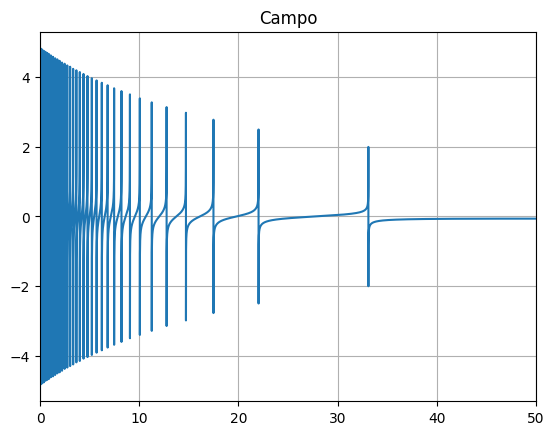

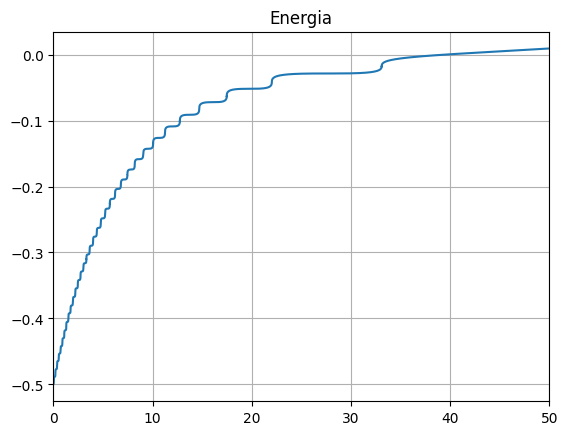

In [22]:

# -*- coding: utf-8 -*-
"""
Created on September 2024

@author: Emanuel Fernandes de Lima

Optimal solution of classical dynamics: intrinsic optimal solution

"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#parâmetros (globais) de conversão
auVm=5.14220826e2 # 1 atomic unit in 1.e9 V/m
aufts=0.02418884254 # 1 au em femtosegundos
audebye=2.541746 # 1 au in debye
aueV=27.211324570273 # 1 au in eV


# MsC softening parameter
alpha=0.1  #0.125
alphsq2=alpha*np.sqrt(2)

# Parameter for the Morse potential
q=1.
m=1.

#parameters for the calculations
t0=22.47/aufts
tf=50/aufts  #40

print("final time=",tf, tf*aufts)
print("t0 parameter= ",t0)

# Parameter for the evolution
dt=0.005
n=round(tf/dt)
time=np.zeros(n+1)

print("number of time steps= ",n,n*dt*aufts,tf*aufts)

#Position, momentum and field vectors
x=np.zeros(2)
rvec=np.zeros(n+1)
pvec=np.zeros(n+1)
uvec=np.zeros(n+1)
E0vec=np.zeros(n+1)
def V(y):
  if y>0. :
    return -1/np.sqrt(y**2+alpha**2)
  else:
    return (np.exp(-2*y/alphsq2)-2*np.exp(-y/alphsq2))/alpha

def dV(y):
  if y>0. :
    return y/(y**2+alpha**2)**(1.5)
  else:
    return (2/alpha/alphsq2)*(-np.exp(-2*y/alphsq2)+np.exp(-y/alphsq2))

def u(p,t):
  return -2*p/(q*(t+t0))

def eqdiff(t,x):
  dx=np.zeros(2)
  dx[0]=x[1]/m
  dx[1]=-dV(x[0])+2*x[1]/(t+t0)
  return dx

#Runge-Kutta
def rk4(t,x,dt):
  k1=eqdiff(t,x)
  k2=eqdiff(t+dt/2,x+dt*k1/2)
  k3=eqdiff(t+dt/2,x+dt*k2/2)
  k4=eqdiff(t+dt,x+dt*k3)
  return x+dt*(k1+2*k2+2*k3+k4)/6

# Condições iniciais
time[0]=0
Ei=-0.5# initial energy
retorn=np.sqrt(1/Ei**2-alpha**2)
x[0]=0.9*retorn
x[1]=-np.sqrt(2*(Ei-V(x[0]))) #
rvec[0]=x[0]
pvec[0]=x[1]
uvec[0]=-2*pvec[0]/q/t0
E0vec[0]=0.5*pvec[0]**2+V(rvec[0])

print("Posição inicial=",rvec[0])
print("Momento inicial=",pvec[0])
print("Campo em t=0 =",uvec[0])

#Iteração
for i in range(n):
  t=dt*i
  x=rk4(t,x,dt)
  time[i+1]=t+dt
  rvec[i+1]=x[0]
  pvec[i+1]=x[1]
  uvec[i+1]=-2*pvec[i+1]/(t+dt+t0)/q
  E0vec[i+1]=0.5*pvec[i+1]**2+V(rvec[i+1])

print(time[-1]*aufts)

print()
print("transfered Energy = ",integrate.simpson(-pvec*uvec*q, dx=dt))
print("Cost Functional= ",integrate.simpson(uvec**2, dx=dt))
print()

print("Campo em t=t_f =",uvec[-1]*auVm)
print("derivada do potencial em r(tf)= ",dV(rvec[-1]))
print("Posição final=",rvec[n])
print("Momento final=",pvec[n])

plt.plot(time*aufts,rvec)
plt.xlim(0,tf*aufts)
plt.title("POsição")
plt.grid()
plt.show()

plt.plot(time*aufts,pvec)
plt.title("Momentum")
plt.xlim(0,tf*aufts)
plt.grid()
plt.show()

plt.plot(time*aufts,uvec*auVm)#,marker='.'
plt.title("Campo")
plt.xlim(0,tf*aufts)
plt.grid()
plt.show()


plt.plot(time*aufts,E0vec)#,marker='.'
plt.title("Energia")
plt.xlim(0,tf*aufts)
plt.grid()
plt.show()








 # 428.083320148944
#Cost Functional=  6.868004185759812


In [18]:
tf*aufts
50/aufts

2067.0687287875494

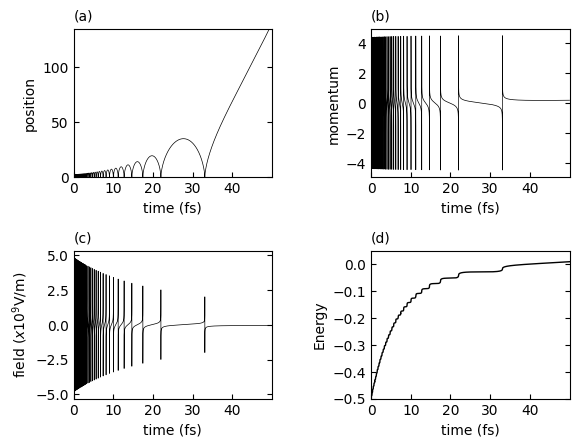

In [23]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs[0,0].set_title("(a)",fontsize = 10, loc = 'left')
axs[0,0].set_ylabel("position")
#axs[0,0].set_yticks(np.arange(0., 1.15, 0.1))
axs[0,0].set_xticks(np.arange(0, 41, 10))
axs[0,0].set_xlim(0,50)
axs[0,0].set_ylim(0,135)
axs[0,0].set_xlabel("time (fs)")
axs[0,0].plot(time*aufts,rvec,linewidth=0.5,color="black") #,label='$|c_g(t)|^2$'
#axs[0,0].plot(time*aufts,psi2d,linewidth=0.5,color="red",linestyle='dashed',label='$|c_e(t)|^2$')
axs[0,0].tick_params(right=True,direction='in')
#axs[0,0].plot(seltime*aufts,c1danasl,linestyle='--', marker='o',markersize=2, color='b',linewidth=0.5,label="P(t)")
#axs[0,0].legend(bbox_to_anchor=(0.64, 0.6,0.25,0.25),fontsize="6")


#theta = np.arange(-np.pi, np.pi+np.pi/8, step=(np.pi / 16))
#axs[0,1].set_yticks([0, np.pi/16, np.pi/8], [0,'$\pi/16$','$\pi/8$']) #['$-\pi$', '$-7\pi$/8', '$-3\pi$/4', '$-5\pi$/8', '-$\pi$/2', '$-3\pi$/8',
                                                                      # '$-\pi$/4', '$-\pi$/8', '0', '$\pi$/8', '$\pi$/4', '$3\pi$/8', '$\pi$/2',
                                                                      # '$5\pi$/8', '$3\pi$/4', '$7\pi$/8','$\pi$'])
axs[0,1].set_title("(b)",fontsize = 10, loc = 'left')
axs[0,1].set_ylabel("momentum")
axs[0,1].set_xlim(0,50)
axs[0,1].set_xlabel("time (fs)")
axs[0,1].set_xticks(np.arange(0, 41, 10))
axs[0,1].tick_params(right=True,direction='in')
axs[0, 1].plot(time*aufts,pvec,linewidth=0.5,color="black")#,label="$\phi(t)$"
#axs[0, 1].plot(seltime*aufts,phaseran,linestyle='--', marker='o',markersize=2, color='b',linewidth=0.5,label="$\Phi(t)$")
#axs[0,1].legend(bbox_to_anchor=(0.63, 0.3,0.25,0.25),fontsize="7")



axs[1,0].set_title("(c)",fontsize = 10, loc = 'left')
axs[1,0].set_ylabel("field ($x10^9$V/m)")
axs[1,0].set_xlabel("time (fs)")
axs[1,0].set_xlim(0,50)
#axs[1,0].set_yticks(np.arange(-2, 2.1, 0.5))
axs[1,0].set_xticks(np.arange(0, 41, 10))
axs[1,0].tick_params(right=True,direction='in')
axs[1, 0].plot(time*aufts,uvec*auVm,color="black",linewidth=0.5)


axs[1,1].set_xticks(np.arange(0, 41, 10))
axs[1,1].set_title("(d)",fontsize = 10, loc = 'left')
axs[1,1].set_xlim(0,50)
axs[1,1].set_ylim(-0.5, 0.05)
axs[1,1].set_xlabel("time (fs)")
axs[1,1].set_ylabel("Energy")
axs[1,1].tick_params(right=True,direction='in')
axs[1,1].set_yticks(np.arange(-0.5, 0.01, 0.1))
axs[1, 1].plot(time*aufts,E0vec,color="black",linewidth=1)

fig.savefig('teste.pdf')
plt.show()

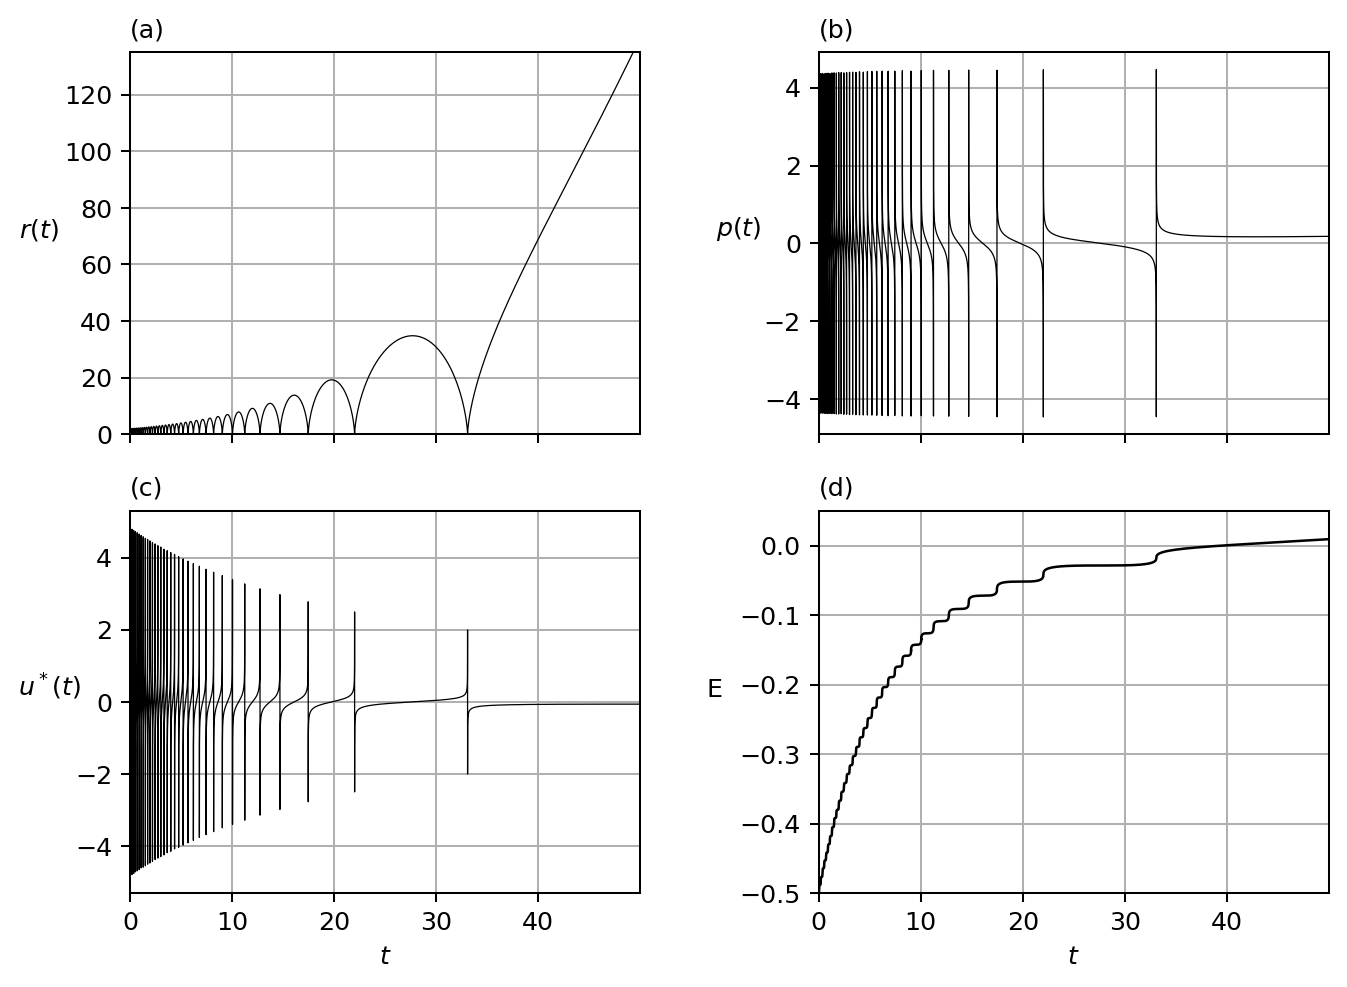

In [23]:
fig, axs = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(8.5, 6)
fig.set_dpi(182)
fig.subplots_adjust(hspace=0.2, wspace=0.35)
axs[0,0].set_title("(a)",fontsize = 10, loc = 'left')
axs[0,0].set_ylabel("$r(t)$", rotation=0, labelpad=10)
#axs[0,0].set_yticks(np.arange(0., 1.15, 0.1))
axs[0,0].set_xticks(np.arange(0, 41, 10))
axs[0,0].set_xlim(0,50)
axs[0,0].set_ylim(0,135)
#axs[0,0].set_xlabel("$t$ [fs]")
axs[0,0].plot(time*aufts,rvec,linewidth=0.5,color="black") #,label='$|c_g(t)|^2$'
axs
#axs[0,0].plot(time*aufts,psi2d,linewidth=0.5,color="red",linestyle='dashed',label='$|c_e(t)|^2$')
#axs[0,0].tick_params(right=True,direction='in')
#axs[0,0].plot(seltime*aufts,c1danasl,linestyle='--', marker='o',markersize=2, color='b',linewidth=0.5,label="P(t)")
#axs[0,0].legend(bbox_to_anchor=(0.64, 0.6,0.25,0.25),fontsize="6")


#theta = np.arange(-np.pi, np.pi+np.pi/8, step=(np.pi / 16))
#axs[0,1].set_yticks([0, np.pi/16, np.pi/8], [0,'$\pi/16$','$\pi/8$']) #['$-\pi$', '$-7\pi$/8', '$-3\pi$/4', '$-5\pi$/8', '-$\pi$/2', '$-3\pi$/8',
                                                                      # '$-\pi$/4', '$-\pi$/8', '0', '$\pi$/8', '$\pi$/4', '$3\pi$/8', '$\pi$/2',
                                                                      # '$5\pi$/8', '$3\pi$/4', '$7\pi$/8','$\pi$'])
axs[0,1].set_title("(b)",fontsize = 10, loc = 'left')
axs[0,1].set_ylabel("$p(t)$", rotation=0, labelpad=10)
axs[0,1].set_xlim(0,50)
#axs[0,1].set_xlabel("$t$ [fs]")
axs[0,1].set_xticks(np.arange(0, 41, 10))
#axs[0,1].tick_params(right=True,direction='in')
axs[0, 1].plot(time*aufts,pvec,linewidth=0.5,color="black")#,label="$\phi(t)$"
#axs[0, 1].plot(seltime*aufts,phaseran,linestyle='--', marker='o',markersize=2, color='b',linewidth=0.5,label="$\Phi(t)$")
#axs[0,1].legend(bbox_to_anchor=(0.63, 0.3,0.25,0.25),fontsize="7")



axs[1,0].set_title("(c)",fontsize = 10, loc = 'left')
axs[1,0].set_ylabel("$u^*(t)$", rotation=0, labelpad=10)
axs[1,0].set_xlabel("$t$")
axs[1,0].set_xlim(0,50)
#axs[1,0].set_yticks(np.arange(-2, 2.1, 0.5))
axs[1,0].set_xticks(np.arange(0, 41, 10))
#axs[1,0].tick_params(right=True,direction='in')
axs[1, 0].plot(time*aufts,uvec*auVm,color="black",linewidth=0.5)


axs[1,1].set_xticks(np.arange(0, 41, 10))
axs[1,1].set_title("(d)",fontsize = 10, loc = 'left')
axs[1,1].set_xlim(0,50)
axs[1,1].set_ylim(-0.5, 0.05)
axs[1,1].set_xlabel("$t$")
axs[1,1].set_ylabel("E", rotation=0, labelpad=10)
#axs[1,1].tick_params(right=True,direction='in')
axs[1,1].set_yticks(np.arange(-0.5, 0.01, 0.1))
axs[1, 1].plot(time*aufts,E0vec,color="black",linewidth=1)



axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)
fig.savefig('Fig2-1.pdf')
plt.show()

final time= 4134.137457575099 100.0
t0 parameter=  1422.970112897349
number of time steps=  826827 99.9999405541029 100.0
Posição inicial= 1.6497272501841025
Momento inicial= -0.30137976163009533
Campo em t=0 = 0.0004235925391524178
99.9999405541029

transfered Energy =  0.49209049503822777
Cost Functional=  0.0005093346852681148

Campo em t=t_f = -0.0004378048531510013
derivada do potencial em r(tf)=  6.26024410172087e-05
Posição final= 126.38377270728967
Momento final= 0.002365644743350693


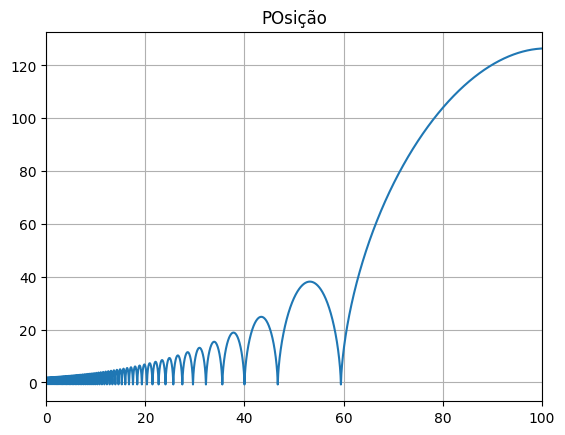

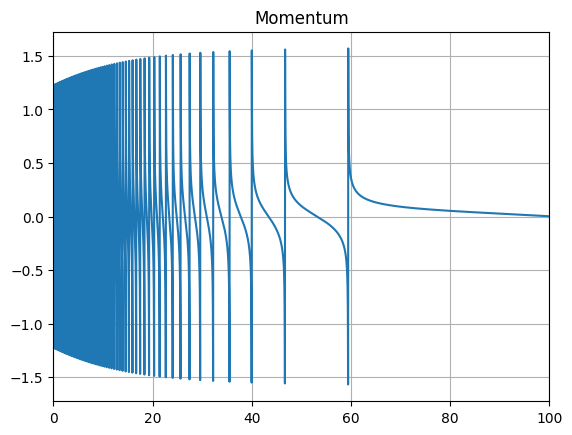

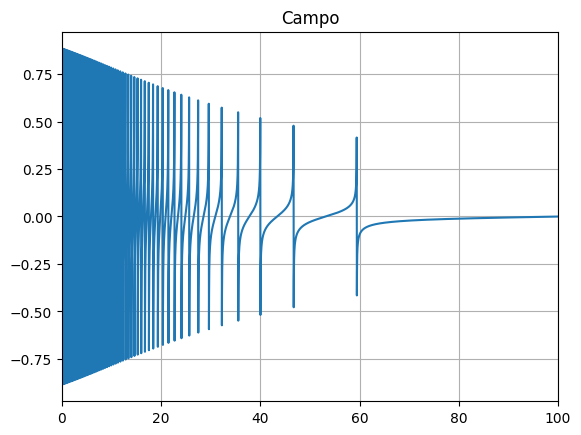

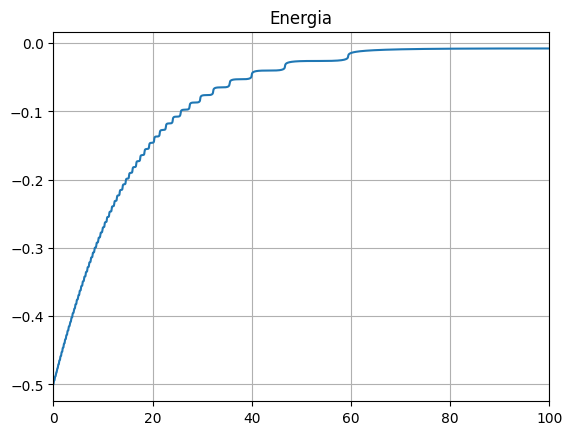

In [24]:

# -*- coding: utf-8 -*-
"""
Created on September 2024

@author: Emanuel Fernandes de Lima

Optimal solution of classical dynamics: intrinsic optimal solution

"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#parâmetros (globais) de conversão
auVm=5.14220826e2 # 1 atomic unit in 1.e9 V/m
aufts=0.02418884254 # 1 au em femtosegundos
audebye=2.541746 # 1 au in debye
aueV=27.211324570273 # 1 au in eV


# MsC softening parameter
alpha=0.8  #0.125
alphsq2=alpha*np.sqrt(2)

# Parameter for the Morse potential
q=1.
m=1.

#parameters for the calculations
t0=34.42/aufts
tf=100/aufts  #40

print("final time=",tf, tf*aufts)
print("t0 parameter= ",t0)

# Parameter for the evolution
dt=0.005
n=round(tf/dt)
time=np.zeros(n+1)

print("number of time steps= ",n,n*dt*aufts,tf*aufts)

#Position, momentum and field vectors
x=np.zeros(2)
rvec=np.zeros(n+1)
pvec=np.zeros(n+1)
uvec=np.zeros(n+1)
E0vec=np.zeros(n+1)
def V(y):
  if y>0. :
    return -1/np.sqrt(y**2+alpha**2)
  else:
    return (np.exp(-2*y/alphsq2)-2*np.exp(-y/alphsq2))/alpha

def dV(y):
  if y>0. :
    return y/(y**2+alpha**2)**(1.5)
  else:
    return (2/alpha/alphsq2)*(-np.exp(-2*y/alphsq2)+np.exp(-y/alphsq2))

def u(p,t):
  return -2*p/(q*(t+t0))

def eqdiff(t,x):
  dx=np.zeros(2)
  dx[0]=x[1]/m
  dx[1]=-dV(x[0])+2*x[1]/(t+t0)
  return dx

#Runge-Kutta
def rk4(t,x,dt):
  k1=eqdiff(t,x)
  k2=eqdiff(t+dt/2,x+dt*k1/2)
  k3=eqdiff(t+dt/2,x+dt*k2/2)
  k4=eqdiff(t+dt,x+dt*k3)
  return x+dt*(k1+2*k2+2*k3+k4)/6

# Condições iniciais
time[0]=0
Ei=-0.5# initial energy
retorn=np.sqrt(1/Ei**2-alpha**2)
x[0]=0.9*retorn
x[1]=-np.sqrt(2*(Ei-V(x[0]))) #
rvec[0]=x[0]
pvec[0]=x[1]
uvec[0]=-2*pvec[0]/q/t0
E0vec[0]=0.5*pvec[0]**2+V(rvec[0])

print("Posição inicial=",rvec[0])
print("Momento inicial=",pvec[0])
print("Campo em t=0 =",uvec[0])

#Iteração
for i in range(n):
  t=dt*i
  x=rk4(t,x,dt)
  time[i+1]=t+dt
  rvec[i+1]=x[0]
  pvec[i+1]=x[1]
  uvec[i+1]=-2*pvec[i+1]/(t+dt+t0)/q
  E0vec[i+1]=0.5*pvec[i+1]**2+V(rvec[i+1])

print(time[-1]*aufts)

print()
print("transfered Energy = ",integrate.simpson(-pvec*uvec*q, dx=dt))
print("Cost Functional= ",integrate.simpson(uvec**2, dx=dt))
print()

print("Campo em t=t_f =",uvec[-1]*auVm)
print("derivada do potencial em r(tf)= ",dV(rvec[-1]))
print("Posição final=",rvec[n])
print("Momento final=",pvec[n])

plt.plot(time*aufts,rvec)
plt.xlim(0,tf*aufts)
plt.title("POsição")
plt.grid()
plt.show()

plt.plot(time*aufts,pvec)
plt.title("Momentum")
plt.xlim(0,tf*aufts)
plt.grid()
plt.show()

plt.plot(time*aufts,uvec*auVm)#,marker='.'
plt.title("Campo")
plt.xlim(0,tf*aufts)
plt.grid()
plt.show()


plt.plot(time*aufts,E0vec)#,marker='.'
plt.title("Energia")
plt.xlim(0,tf*aufts)
plt.grid()
plt.show()








 # 428.083320148944
#Cost Functional=  6.868004185759812


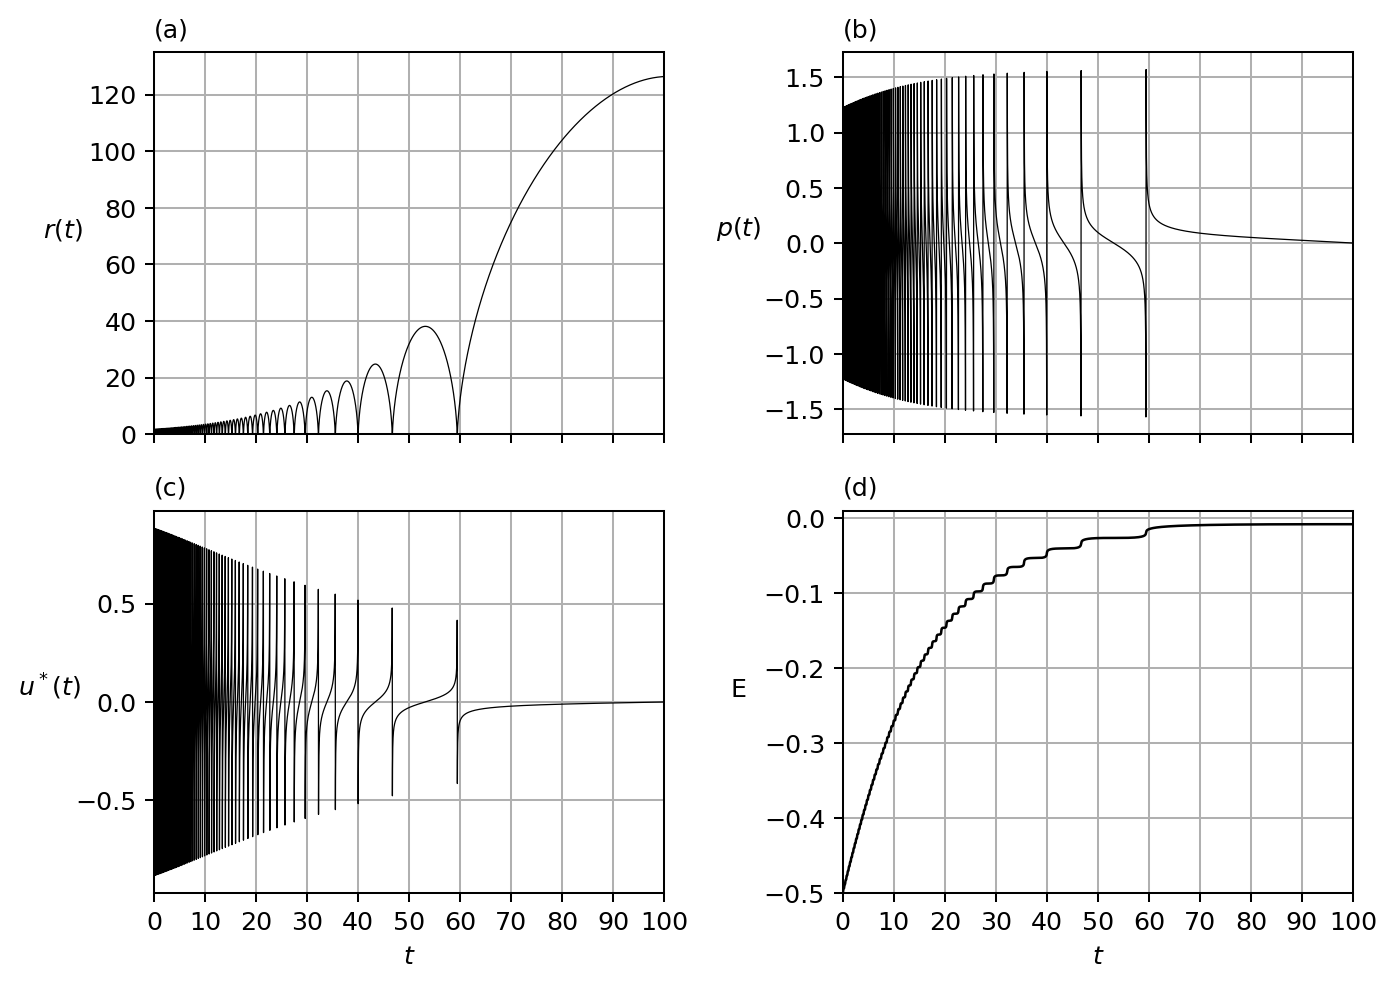

In [25]:
fig, axs = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(8.5, 6)
fig.set_dpi(182)
fig.subplots_adjust(hspace=0.2, wspace=0.35)
axs[0,0].set_title("(a)",fontsize = 10, loc = 'left')
axs[0,0].set_ylabel("$r(t)$", rotation=0, labelpad=10)
#axs[0,0].set_yticks(np.arange(0., 1.15, 0.1))
axs[0,0].set_xticks(np.arange(0, 101, 10))
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,135)
#axs[0,0].set_xlabel("$t$ [fs]")
axs[0,0].plot(time*aufts,rvec,linewidth=0.5,color="black") #,label='$|c_g(t)|^2$'
axs
#axs[0,0].plot(time*aufts,psi2d,linewidth=0.5,color="red",linestyle='dashed',label='$|c_e(t)|^2$')
#axs[0,0].tick_params(right=True,direction='in')
#axs[0,0].plot(seltime*aufts,c1danasl,linestyle='--', marker='o',markersize=2, color='b',linewidth=0.5,label="P(t)")
#axs[0,0].legend(bbox_to_anchor=(0.64, 0.6,0.25,0.25),fontsize="6")


#theta = np.arange(-np.pi, np.pi+np.pi/8, step=(np.pi / 16))
#axs[0,1].set_yticks([0, np.pi/16, np.pi/8], [0,'$\pi/16$','$\pi/8$']) #['$-\pi$', '$-7\pi$/8', '$-3\pi$/4', '$-5\pi$/8', '-$\pi$/2', '$-3\pi$/8',
                                                                      # '$-\pi$/4', '$-\pi$/8', '0', '$\pi$/8', '$\pi$/4', '$3\pi$/8', '$\pi$/2',
                                                                      # '$5\pi$/8', '$3\pi$/4', '$7\pi$/8','$\pi$'])
axs[0,1].set_title("(b)",fontsize = 10, loc = 'left')
axs[0,1].set_ylabel("$p(t)$", rotation=0, labelpad=10)
axs[0,1].set_xlim(0,100)
#axs[0,1].set_xlabel("$t$ [fs]")
axs[0,1].set_xticks(np.arange(0, 101, 10))
#axs[0,1].tick_params(right=True,direction='in')
axs[0, 1].plot(time*aufts,pvec,linewidth=0.5,color="black")#,label="$\phi(t)$"
#axs[0, 1].plot(seltime*aufts,phaseran,linestyle='--', marker='o',markersize=2, color='b',linewidth=0.5,label="$\Phi(t)$")
#axs[0,1].legend(bbox_to_anchor=(0.63, 0.3,0.25,0.25),fontsize="7")



axs[1,0].set_title("(c)",fontsize = 10, loc = 'left')
axs[1,0].set_ylabel("$u^*(t)$", rotation=0, labelpad=10)
axs[1,0].set_xlabel("$t$")
axs[1,0].set_xlim(0,100)
#axs[1,0].set_yticks(np.arange(-2, 2.1, 0.5))
axs[1,0].set_xticks(np.arange(0, 101, 10))
#axs[1,0].tick_params(right=True,direction='in')
axs[1, 0].plot(time*aufts,uvec*auVm,color="black",linewidth=0.5)


axs[1,1].set_xticks(np.arange(0, 101, 10))
axs[1,1].set_title("(d)",fontsize = 10, loc = 'left')
axs[1,1].set_xlim(0,100)
axs[1,1].set_ylim(-0.5, 0.01)
axs[1,1].set_xlabel("$t$")
axs[1,1].set_ylabel("E", rotation=0, labelpad=10)
#axs[1,1].tick_params(right=True,direction='in')
axs[1,1].set_yticks(np.arange(-0.5, 0.01, 0.1))
axs[1, 1].plot(time*aufts,E0vec,color="black",linewidth=1)



axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)
fig.savefig('Fig2-2.pdf')
plt.show()

final time= 2067.0687287875494 50.0
t0 parameter=  4.134137457575099
number of time steps=  413414 50.00003074915781 50.0
Posição inicial= 1.6497272501841025
Momento inicial= -0.30137976163009533
Campo em t=0 = 0.1458005519762622
50.00003074915781

transfered Energy =  0.7499956921402968
Cost Functional=  0.19811596889850394

Campo em t=t_f = -0.0011245347266856038
derivada do potencial em r(tf)=  -0.002613391661435589
Posição final= -0.0013356889988191273
Momento final= 0.0022647283626606226


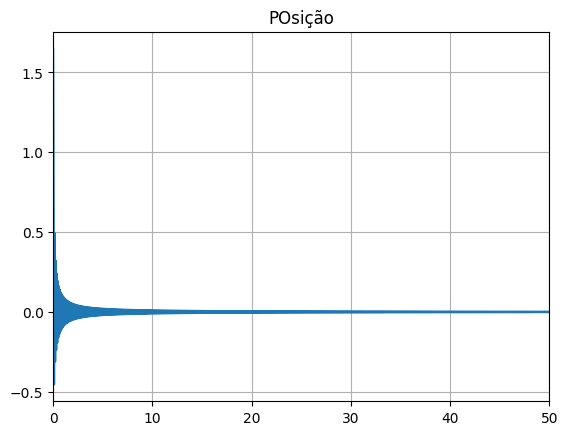

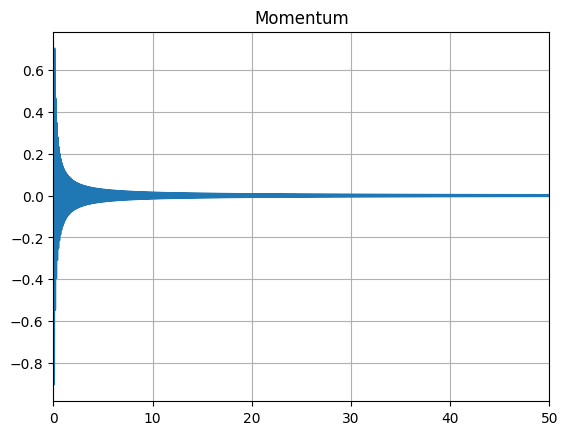

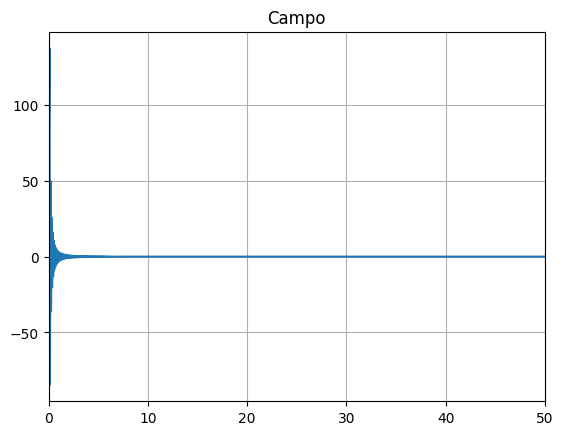

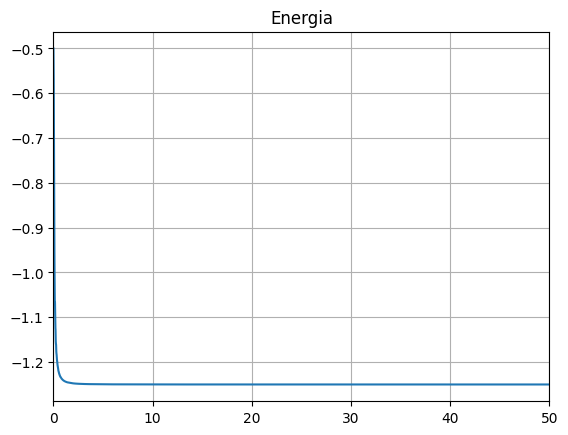

In [20]:

# -*- coding: utf-8 -*-
"""
Created on September 2024

@author: Emanuel Fernandes de Lima

Optimal solution of classical dynamics: intrinsic optimal solution

"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#parâmetros (globais) de conversão
auVm=5.14220826e2 # 1 atomic unit in 1.e9 V/m
aufts=0.02418884254 # 1 au em femtosegundos
audebye=2.541746 # 1 au in debye
aueV=27.211324570273 # 1 au in eV


# MsC softening parameter
alpha=0.8  #0.125
alphsq2=alpha*np.sqrt(2)

# Parameter for the Morse potential
q=1.
m=1.

#parameters for the calculations
t0=0.1/aufts
tf=50/aufts  #40

print("final time=",tf, tf*aufts)
print("t0 parameter= ",t0)

# Parameter for the evolution
dt=0.005
n=round(tf/dt)
time=np.zeros(n+1)

print("number of time steps= ",n,n*dt*aufts,tf*aufts)

#Position, momentum and field vectors
x=np.zeros(2)
rvec=np.zeros(n+1)
pvec=np.zeros(n+1)
uvec=np.zeros(n+1)
E0vec=np.zeros(n+1)
def V(y):
  if y>0. :
    return -1/np.sqrt(y**2+alpha**2)
  else:
    return (np.exp(-2*y/alphsq2)-2*np.exp(-y/alphsq2))/alpha

def dV(y):
  if y>0. :
    return y/(y**2+alpha**2)**(1.5)
  else:
    return (2/alpha/alphsq2)*(-np.exp(-2*y/alphsq2)+np.exp(-y/alphsq2))

def u(p,t):
  return -2*p/(q*(t+t0))

def eqdiff(t,x):
  dx=np.zeros(2)
  dx[0]=x[1]/m
  dx[1]=-dV(x[0])-2*x[1]/(t+t0)
  return dx

#Runge-Kutta
def rk4(t,x,dt):
  k1=eqdiff(t,x)
  k2=eqdiff(t+dt/2,x+dt*k1/2)
  k3=eqdiff(t+dt/2,x+dt*k2/2)
  k4=eqdiff(t+dt,x+dt*k3)
  return x+dt*(k1+2*k2+2*k3+k4)/6

# Condições iniciais
time[0]=0
Ei=-0.5# initial energy
retorn=np.sqrt(1/Ei**2-alpha**2)
x[0]=0.9*retorn
x[1]=-np.sqrt(2*(Ei-V(x[0]))) #
rvec[0]=x[0]
pvec[0]=x[1]
uvec[0]=-2*pvec[0]/q/t0
E0vec[0]=0.5*pvec[0]**2+V(rvec[0])

print("Posição inicial=",rvec[0])
print("Momento inicial=",pvec[0])
print("Campo em t=0 =",uvec[0])

#Iteração
for i in range(n):
  t=dt*i
  x=rk4(t,x,dt)
  time[i+1]=t+dt
  rvec[i+1]=x[0]
  pvec[i+1]=x[1]
  uvec[i+1]=-2*pvec[i+1]/(t+dt+t0)/q
  E0vec[i+1]=0.5*pvec[i+1]**2+V(rvec[i+1])

print(time[-1]*aufts)

print()
print("transfered Energy = ",integrate.simpson(-pvec*uvec*q, dx=dt))
print("Cost Functional= ",integrate.simpson(uvec**2, dx=dt))
print()

print("Campo em t=t_f =",uvec[-1]*auVm)
print("derivada do potencial em r(tf)= ",dV(rvec[-1]))
print("Posição final=",rvec[n])
print("Momento final=",pvec[n])

plt.plot(time*aufts,rvec)
plt.xlim(0,tf*aufts)
plt.title("POsição")
plt.grid()
plt.show()

plt.plot(time*aufts,pvec)
plt.title("Momentum")
plt.xlim(0,tf*aufts)
plt.grid()
plt.show()

plt.plot(time*aufts,uvec*auVm)#,marker='.'
plt.title("Campo")
plt.xlim(0,tf*aufts)
plt.grid()
plt.show()


plt.plot(time*aufts,E0vec)#,marker='.'
plt.title("Energia")
plt.xlim(0,tf*aufts)
plt.grid()
plt.show()








 # 428.083320148944
#Cost Functional=  6.868004185759812


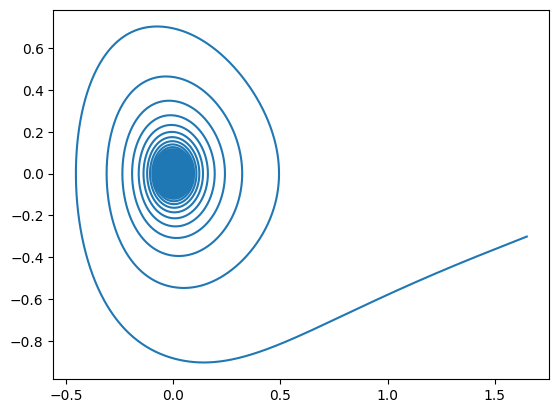

In [21]:
plt.plot(rvec, pvec)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#parâmetros (globais) de conversão
auVm=5.14220826e2 # 1 atomic unit in 1.e9 V/m
aufts=0.02418884254 # 1 au em femtosegundos
audebye=2.541746 # 1 au in debye
aueV=27.211324570273 # 1 au in eV

# Parameter for the Morse potential
q=0.31
m=1700

#parameters for the calculations
#t0=3/aufts
tf=70/aufts

print("final time=",tf)
print("t0 parameter= ",t0)

# Parameter for the evolution
dt=0.05
n=round(tf/dt)
time=np.zeros(n+1)

print("number of time steps= ",n,n*dt*aufts,tf*aufts)

#Position, momentum and field vectors
x=np.zeros(2)
rvec=np.zeros(n+1)
pvec=np.zeros(n+1)
uvec=np.zeros(n+1)


# energy to be transfered:

etvec2=np.zeros(n+1)



def V(y):
  return D*(1-np.exp(-a*y))**2

def dV(y):
  return 2*a*D*(np.exp(-a*y)-np.exp(-2*a*y))

#def u(p,t):
#  return 2*p/(q*(t+t0))

def eqdiff(t,x):
  dx=np.zeros(2)
  dx[0]=x[1]/m
  dx[1]=-dV(x[0])+2*x[1]/(t+t0)
  return dx

#Runge-Kutta
def rk4(t,x,dt):
  k1=eqdiff(t,x)
  k2=eqdiff(t+dt/2,x+dt*k1/2)
  k3=eqdiff(t+dt/2,x+dt*k2/2)
  k4=eqdiff(t+dt,x+dt*k3)
  return x+dt*(k1+2*k2+2*k3+k4)/6

#print("Posição inicial=",rvec[0])
#print("Momento inicial=",pvec[0])
#print("Campo em t=0 =",uvec[0])

# auxiliary vectors
nv=200
utf=np.zeros(nv)
fc=np.zeros(nv)
t0vec=np.zeros(nv)
cvec=np.zeros(nv)
Jvec=np.zeros(nv)

t0inter=2.
dt0=t0inter/nv
#Iteração
for j in range(nv):
  # Condições iniciais
  etvec=np.zeros(n+1)
  x=np.zeros(2)
  rvec=np.zeros(n+1)
  pvec=np.zeros(n+1)
  uvec=np.zeros(n+1)
  time[0]=0
  x[0]=0.05
  x[1]=0.
  rvec[0]=x[0]
  pvec[0]=x[1]
  t0=(2.+j*dt0)/aufts
  uvec[0]=2*pvec[0]/q/t0
  for i in range(n):
    t=dt*i
    x=rk4(t,x,dt)
    time[i+1]=t+dt
    rvec[i+1]=x[0]
    pvec[i+1]=x[1]
    uvec[i+1]=2*pvec[i+1]/(t+dt+t0)/q
  etvec=q*uvec*pvec
  utf[j]=uvec[-1]
  #fc[j]=q*pvec[n]
  t0vec[j]=t0*aufts
  #print(t0vec[j],utf[j],fc[j])
  cvec[j]=integrate.simpson(etvec, dx=dt)
  Jvec[j]=integrate.simpson(uvec**2, dx=dt)



data1 = np.column_stack([t0vec, Jvec])
np.savetxt("Jcost.txt", data1, fmt=['%f','%f'])

data2 = np.column_stack([t0vec, utf])
np.savetxt("utf.txt", data2, fmt=['%f','%f'])

data3 = np.column_stack([t0vec, cvec])
np.savetxt("C.txt", data3, fmt=['%f','%f'])


#plt.plot(t0vec,utf)
#plt.plot(t0vec,fc)
#plt.ylim(-1,1)
#plt.grid()
#plt.show()








final time= 2893.896220302569
t0 parameter=  88.56562675363135
number of time steps=  57878 70.000091426506 70.0


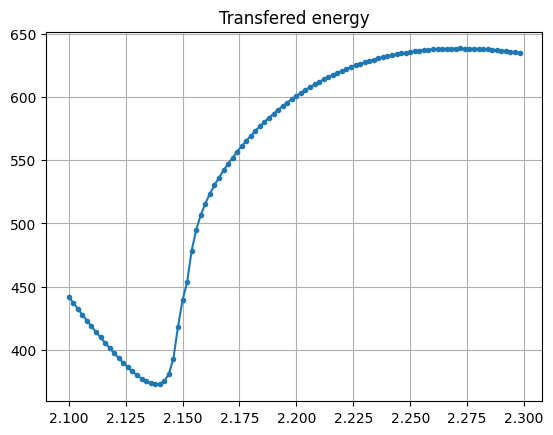

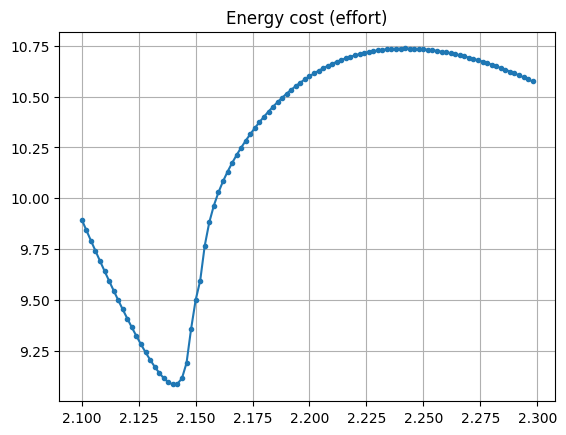

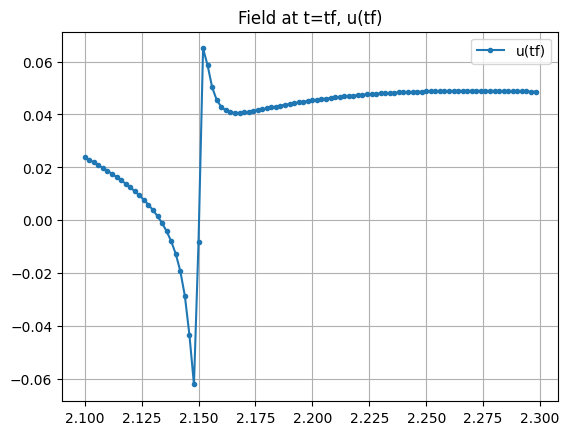

In [ ]:

plt.plot(t0vec,cvec,marker=".",label='Tranfered Energy')
plt.title("Transfered energy")
plt.grid()
plt.show()


plt.plot(t0vec,Jvec,marker=".",label='Cost Functional')
plt.title("Energy cost (effort)")
plt.grid()
plt.show()

plt.plot(t0vec,utf,marker=".",label='u(tf)')
plt.title("Field at t=tf, u(tf)")
plt.legend()
plt.grid()
plt.show()



#plt.plot(time*aufts,rvec)
#plt.xlim(0,tf*aufts)
#plt.grid()
#plt.show()

#plt.plot(time*aufts,pvec)
#plt.xlim(0,tf*aufts)
#plt.grid()
#plt.show()

#plt.plot(time*aufts,uvec*auVm)
#plt.xlim(0,tf*aufts)
#plt.grid()
#plt.show()

#etvec=q*uvec*pvec
#etvec2=2*pvec**2/(time+t0)

#print("Energia transferida= ",integrate.simpson(etvec, dx=dt))
#print("Energia transferida2= ",integrate.simpson(etvec2, dx=dt)) # testando a consistência


#print(uvec[n],q*pvec[n])
